### LINEAR REGRESSION IMPLEMENTATION FROM SCRATCH 
##### UTKARSH KHANNA

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv("/Users/utkarshkhanna/Downloads/data_for_lr.csv")


In [32]:
data=data.dropna()

In [33]:
#train inputs and outputs
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

#validation input and output
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)

In [34]:
def forwardPropogation(train_input, parameters):
  m=parameters['m']
  c=parameters['c']
  predictions=np.multiply(m,train_input)
  return predictions

In [35]:
def costFunction(predictions,train_output):
  cost=np.mean((train_output-predictions)**2)*0.5
  return cost

In [36]:
def backwardPropogation(train_input, train_output, predictions):
  derivatives=dict()
  df=predictions-train_output
  dm=np.mean(np.multiply(df,train_input))
  dc=np.mean(df)
  derivatives['dm']=dm
  derivatives['dc']=dc
  return derivatives

In [37]:
def update_parameter(parameters, derivatives, learning_rate):
    parameters["m"]=parameters["m"]-learning_rate*derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate*derivatives["dc"]
    return parameters

In [46]:
def train(train_input,train_output,learning_rate, iters):
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,1)
    plt.figure()
    loss=list()

    #iteration
    for i in range(iters):
        #forward propogation
        prediction=forwardPropogation(train_input, parameters)

        #cost function
        cost=costFunction(prediction,train_output)
        loss.append(cost)
        print(f"Iteration={i+1}, Loss={cost}")

        #plot
        fig, ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,prediction, "*", label="Training")

        legend=ax.legend()

        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,prediction, "*", label="Training")
        plt.show()

        #backward propogation
        derivatives=backwardPropogation(train_input,train_output,prediction)

        parameters=update_parameter(parameters,derivatives,learning_rate)
    return parameters



### TRAINING

Iteration=1, Loss=1560.1998885128926


<Figure size 432x288 with 0 Axes>

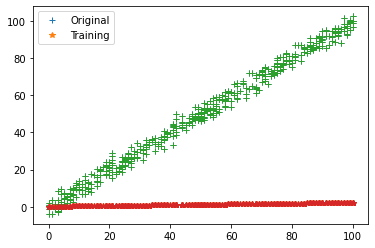

Iteration=2, Loss=710.1613341263055


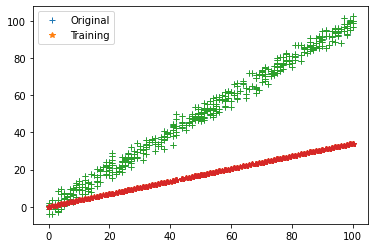

Iteration=3, Loss=324.41222531376656


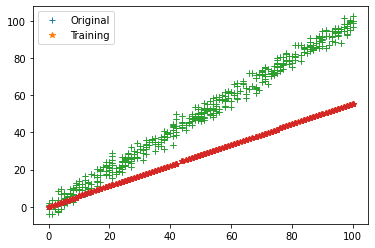

Iteration=4, Loss=149.35854782845746


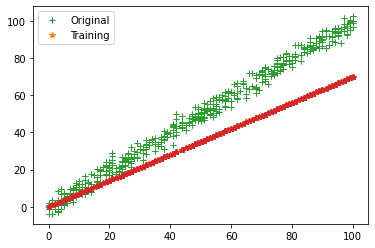

Iteration=5, Loss=69.91885684521152


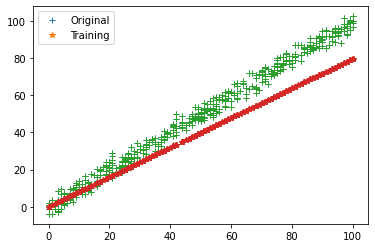

Iteration=6, Loss=33.868974351065056


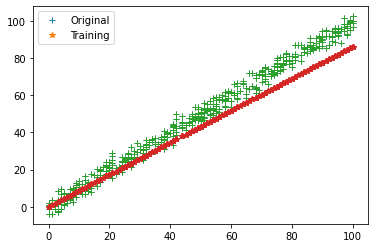

Iteration=7, Loss=17.509469275499512


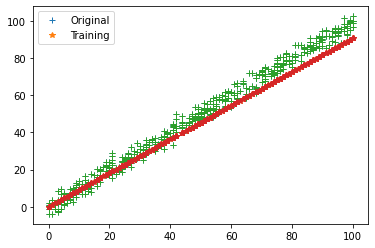

Iteration=8, Loss=10.085494832284317


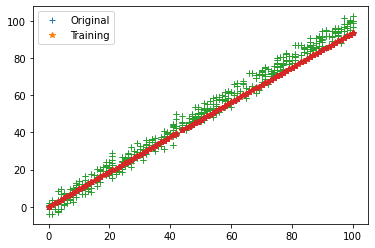

Iteration=9, Loss=6.716481143977059


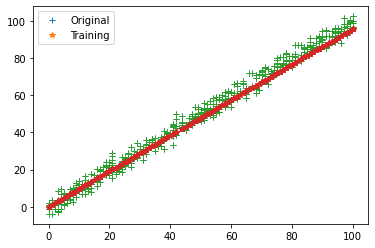

Iteration=10, Loss=5.187616339980495


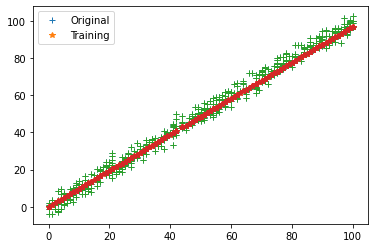

Iteration=11, Loss=4.493814591114977


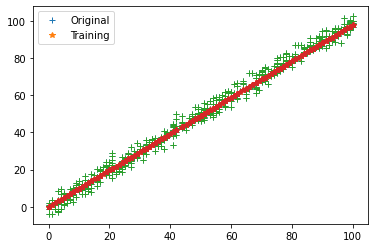

Iteration=12, Loss=4.178966041085869


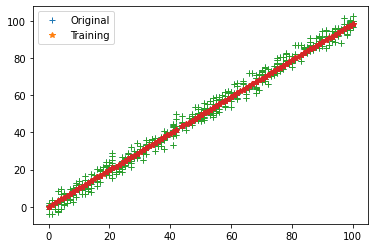

Iteration=13, Loss=4.036087171700595


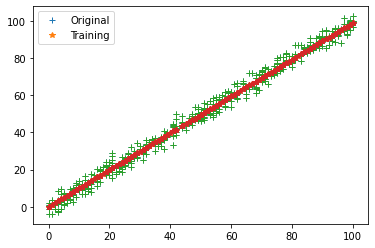

Iteration=14, Loss=3.971248469680444


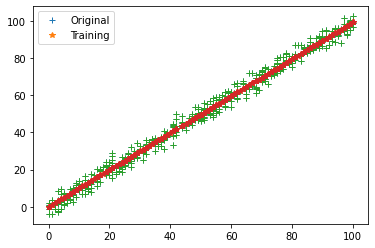

Iteration=15, Loss=3.9418245436811294


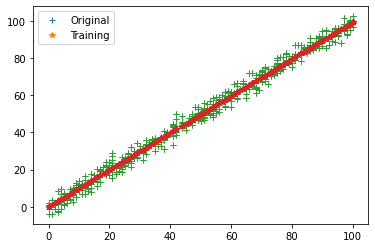

In [39]:
parameters, loss=train(train_input, train_output, 0.0001, 15)